In [1]:
library(ggplot2)
library(scales)

In [2]:
df = read.csv('Longitudinal_Tat_df.csv')

df2 = na.omit(df)

df2$Date.of.visit = as.Date(df2$Date.of.visit)

In [46]:
# df2 has 385 sequences / 203 patients including 2015
# df2 has 281 sequences / 201 patients without 2015
patient_list = unique(df2$Patient)

out = c()
more_than_2_visits = c()

for (patient in patient_list){
    
    # if > 2 visits
    if (sum(df2$Patient == patient) > 2){
        
        more_than_2_visits = c(more_than_2_visits, patient)
        
        dummy = df2[df2$Patient == patient,]
        
        # if has more than just 101
        if (length(unique( dummy$Tat_len )) > 1 | !(101 %in% unique( dummy$Tat_len ))){
            
            out = c(out, patient)
            
        }
    }
}

In [51]:
length(more_than_2_visits)

[1] 35

In [4]:
# Patient IDs where:
# 1. The patient has > 2 visits. 
# 2. The sequences are not just 101

ids = c("A0001","A0002","A0080","A0067","A0058","A0117","A0110","A0199","A0132","A0113","A0025","A0013","A0010","A0017","A0094")

df3 = df2[df2$Patient %in% ids,]

df3$Tat_len = as.factor(sapply(df3$Tat_len, toString))

df3$Tat_len = factor(df3$Tat_len, levels(df3$Tat_len)[c(1,4,5,6,2,3)])

In [16]:
# No selected patient visits were in 2015. Proof: 
df3$Date.of.visit[df3$Date.of.visit > "2014-01-01"]

[1] "2014-08-07" "2014-08-12" "2014-11-18" "2014-11-11" "2014-02-20"
 [6] "2014-11-25" "2014-05-01" "2014-11-12" "2014-02-17" "2014-07-02"
[11] "2014-10-30" "2014-11-10"

In [5]:
plt = ggplot(data = df3, aes(x = Date.of.visit, y = Tat_len, group = Patient)) + 
	geom_hline(yintercept = 3, color = 'dark orange', linetype = 2) + 
	geom_hline(yintercept = 5, color = 'steel blue', linetype = 2) + 
	geom_point(stat='summary', fun.y=sum) + 
	stat_summary(fun.y=sum, geom="line") + 
	facet_wrap(~ Patient, ncol = 5) + 
	theme_bw() + 
	ylab('') + 
	xlab('') + 
	scale_y_discrete() + # scale_y_continuous(breaks = c(10,31,86,101) )
	scale_x_date(date_breaks = "1 year", labels = date_format("%Y")) +
	theme(panel.grid = element_blank(), 
			axis.text.x = element_text(angle = 90, color = 'black', size = 14),
			axis.text.y = element_text(color = 'black', size = 14)) #Added once all ticks were set and added in Powerpoint

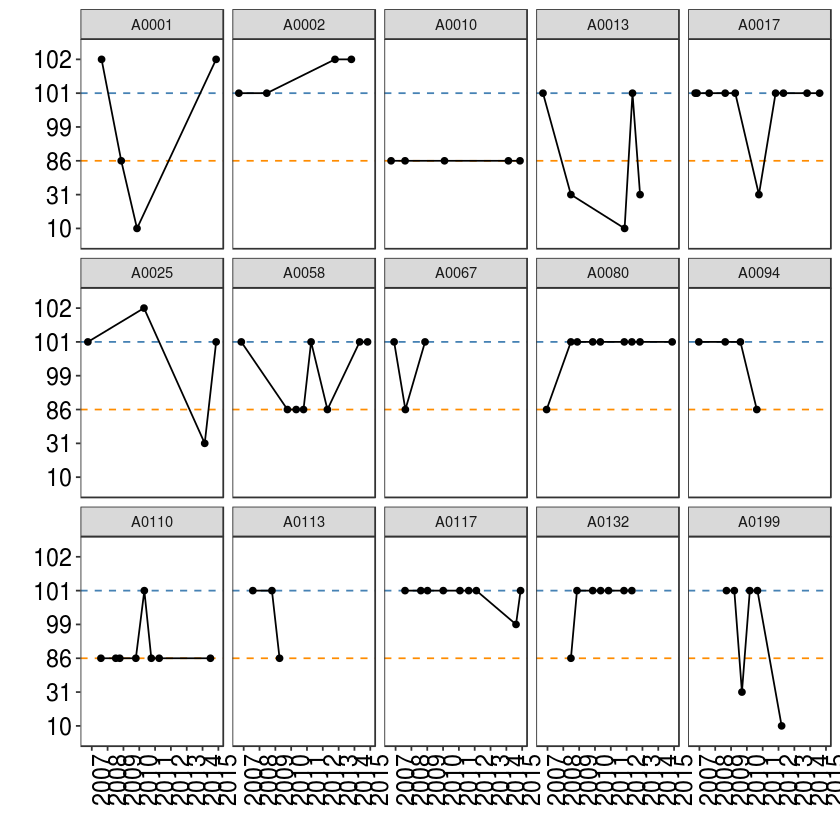

In [6]:
plt

In [ ]:
# Saves the plot. can ignore for now

png("Longitudinal_Tat_Analysis.png", units = "in", width = 7.5, height = 4, res = 300)
plt
dev.off()